In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pickle
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


In [2]:
### Reading and drop na columns
file_names = ['dataframes_list_season_-2016.pkl','dataframes_list_season_-2017.pkl',
              'dataframes_list_season_-2018.pkl', 'dataframes_list_season_-2019.pkl',
              'dataframes_list_season_-2020.pkl', 'dataframes_list_season_-2021.pkl',
              'dataframes_list_season_-2022.pkl','dataframes_list_season_-2023.pkl']

all_cleaned_dataframes = []

for file_name in file_names:
    try:
        with open("Data/"+file_name, 'rb') as file:
            # Load the dataframe from pickle file
            dataframe = pickle.load(file)

            # Filter out columns that start with 'Unnamed:'
            dataframe = dataframe.loc[:, ~dataframe.columns.str.startswith('Unnamed:')]

            # Drop all columns that are entirely NA
            dataframe = dataframe.dropna(axis=1, how='all')

            # Add the cleaned dataframe to the list
            all_cleaned_dataframes.append(dataframe)
            
            ## print(f"Processed {file_name}, columns: {dataframe.columns}")

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

# Concatenate all dataframes into one
df = pd.concat(all_cleaned_dataframes, ignore_index=True)



### delete some more columns
columns_to_delete = ['OT', 'OT_opp', '2OT', '3OT', '2OT_opp', '3OT_opp', '4OT', '4OT_opp',
                    'mp_total_opp','bpm_max','bpm_max_opp']

# Drop the specified columns from the dataframe
df.drop(columns=columns_to_delete, inplace=True)


print("No of duplicate rows: ",df.duplicated().sum())

### Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

print("No of duplicate rows after dropping duplicates: ",df.duplicated().sum())

#### rename columns
df.rename(columns = {'mp_total':'mp'}, inplace=True)

#### Creating Season column
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime if it's not already

# Function to determine the season year based on the month
def get_season_year(row):
    if row['date'].month >= 10:
        return row['date'].year
    else:
        return row['date'].year - 1

# Apply the function to create a new 'season' column
df['season'] = df.apply(get_season_year, axis=1)


print("data shape:", df.shape)

columns_format = list(df.columns)

df.head(2)

No of duplicate rows:  0
No of duplicate rows after dropping duplicates:  0
data shape: (20392, 149)


,mp,fg_total,fga_total,fg%_total,3p_total,3pa_total,3p%_total,ft_total,fta_total,ft%_total,orb_total,drb_total,trb_total,ast_total,stl_total,blk_total,tov_total,pf_total,pts_total,ts%_total,efg%_total,3par_total,ftr_total,orb%_total,drb%_total,trb%_total,ast%_total,stl%_total,blk%_total,tov%_total,usg%_total,ortg_total,drtg_total,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,1,2,3,4,total,home,fg_total_opp,fga_total_opp,fg%_total_opp,3p_total_opp,3pa_total_opp,3p%_total_opp,ft_total_opp,fta_total_opp,ft%_total_opp,orb_total_opp,drb_total_opp,trb_total_opp,ast_total_opp,stl_total_opp,blk_total_opp,tov_total_opp,pf_total_opp,pts_total_opp,ts%_total_opp,efg%_total_opp,3par_total_opp,ftr_total_opp,orb%_total_opp,drb%_total_opp,trb%_total_opp,ast%_total_opp,stl%_total_opp,blk%_total_opp,tov%_total_opp,usg%_total_opp,ortg_total_opp,drtg_total_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,1_opp,2_opp,3_opp,4_opp,total_opp,home_opp,date,season,won,index_opp
0,240.0,38.0,94.0,0.404,9.0,29.0,0.310,10.0,17.0,0.588,11.0,39.0,50.0,26.0,5.0,7.0,10.0,21.0,95.0,0.468,0.452,0.309,0.181,21.6,84.8,51.5,68.4,5.0,10.3,9.0,100.0,95.5,97.5,12.0,22.0,0.571,3.0,7.0,0.50,3.0,4.0,1.0,4.0,10.0,12.0,7.0,1.0,2.0,3.0,4.0,25.0,9.0,0.714,0.714,1.000,2.000,10.8,41.9,23.8,31.2,2.8,18.5,30.4,29.0,138.0,105.0,CLE,17,23,28,27,95,0,37.0,87.0,0.425,7.0,19.0,0.368,16.0,23.0,0.696,7.0,40.0,47.0,13.0,6.0,10.0,13.0,22.0,97.0,0.499,0.466,0.218,0.264,15.2,78.4,48.5,35.1,6.0,15.4,11.8,100.0,97.5,95.5,8.0,22.0,0.750,3.0,5.0,0.75,5.0,5.0,1.0,2.0,8.0,10.0,5.0,2.0,6.0,4.0,6.0,19.0,9.0,0.820,0.875,0.556,1.333,12.2,38.5,26.0,30.3,2.8,14.0,53.2,34.6,162.0,104.0,CHI,26,20,25,26,97,1,2015-10-27,2015,False,NaN
1,240.0,37.0,87.0,0.425,7.0,19.0,0.368,16.0,23.0,0.696,7.0,40.0,47.0,13.0,6.0,10.0,13.0,22.0,97.0,0.499,0.466,0.218,0.264,15.2,78.4,48.5,35.1,6.0,15.4,11.8,100.0,97.5,95.5,8.0,22.0,0.750,3.0,5.0,0.75,5.0,5.0,1.0,2.0,8.0,10.0,5.0,2.0,6.0,4.0,6.0,19.0,9.0,0.820,0.875,0.556,1.333,12.2,38.5,26.0,30.3,2.8,14.0,53.2,34.6,162.0,104.0,CHI,26,20,25,26,97,1,38.0,94.0,0.404,9.0,29.0,0.310,10.0,17.0,0.588,11.0,39.0,50.0,26.0,5.0,7.0,10.0,21.0,95.0,0.468,0.452,0.309,0.181,21.6,84.8,51.5,68.4,5.0,10.3,9.0,100.0,95.5,97.5,12.0,22.0,0.571,3.0,7.0,0.50,3.0,4.0,1.0,4.0,10.0,12.0,7.0,1.0,2.0,3.0,4.0,25.0,9.0,0.714,0.714,1.000,2.000,10.8,41.9,23.8,31.2,2.8,18.5,30.4,29.0,138.0,105.0,CLE,17,23,28,27,95,0,2015-10-27,2015,True,NaN


In [3]:
##### Abbrivate the Team names
team_df = pd.read_excel("Data/"+'Team_full-forms.xlsx')
team_df['team'] = team_df['team'].str.strip()
team_df['team1'] = team_df['team1'].str.strip()


##### Merge and delete the columns
df = pd.merge(team_df, df, on = ['team'], how='inner')
del df['team']
df.rename(columns = {'team1':'team'}, inplace=True)

team_df.rename(columns = {'team':'team_opp'}, inplace=True)
df = pd.merge(team_df, df, on = ['team_opp'], how='inner')
del df['team_opp']
df.rename(columns = {'team1':'team_opp'}, inplace=True)

print("data shape:", df.shape)

df = df[columns_format]

## ordering with date
df['date'] = pd.to_datetime(df['date']).dt.date
df = df.sort_values(by = ['date'], ascending=True).reset_index(drop=True)

df.head()

data shape: (20392, 149)


,mp,fg_total,fga_total,fg%_total,3p_total,3pa_total,3p%_total,ft_total,fta_total,ft%_total,orb_total,drb_total,trb_total,ast_total,stl_total,blk_total,tov_total,pf_total,pts_total,ts%_total,efg%_total,3par_total,ftr_total,orb%_total,drb%_total,trb%_total,ast%_total,stl%_total,blk%_total,tov%_total,usg%_total,ortg_total,drtg_total,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,1,2,3,4,total,home,fg_total_opp,fga_total_opp,fg%_total_opp,3p_total_opp,3pa_total_opp,3p%_total_opp,ft_total_opp,fta_total_opp,ft%_total_opp,orb_total_opp,drb_total_opp,trb_total_opp,ast_total_opp,stl_total_opp,blk_total_opp,tov_total_opp,pf_total_opp,pts_total_opp,ts%_total_opp,efg%_total_opp,3par_total_opp,ftr_total_opp,orb%_total_opp,drb%_total_opp,trb%_total_opp,ast%_total_opp,stl%_total_opp,blk%_total_opp,tov%_total_opp,usg%_total_opp,ortg_total_opp,drtg_total_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,1_opp,2_opp,3_opp,4_opp,total_opp,home_opp,date,season,won,index_opp
0,240.0,37.0,87.0,0.425,7.0,19.0,0.368,16.0,23.0,0.696,7.0,40.0,47.0,13.0,6.0,10.0,13.0,22.0,97.0,0.499,0.466,0.218,0.264,15.2,78.4,48.5,35.1,6.0,15.4,11.8,100.0,97.5,95.5,8.0,22.0,0.750,3.0,5.0,0.750,5.0,5.0,1.0,2.0,8.0,10.0,5.0,2.0,6.0,4.0,6.0,19.0,9.0,0.820,0.875,0.556,1.333,12.2,38.5,26.0,30.3,2.8,14.0,53.2,34.6,162.0,104.0,Chicago Bulls,26,20,25,26,97,1,38.0,94.0,0.404,9.0,29.0,0.310,10.0,17.0,0.588,11.0,39.0,50.0,26.0,5.0,7.0,10.0,21.0,95.0,0.468,0.452,0.309,0.181,21.6,84.8,51.5,68.4,5.0,10.3,9.0,100.0,95.5,97.5,12.0,22.0,0.571,3.0,7.0,0.500,3.0,4.0,1.0,4.0,10.0,12.0,7.0,1.0,2.0,3.0,4.0,25.0,9.0,0.714,0.714,1.000,2.000,10.8,41.9,23.8,31.2,2.8,18.5,30.4,29.0,138.0,105.0,Cleveland Cavaliers,17,23,28,27,95,0,2015-10-27,2015,True,NaN
1,240.0,37.0,96.0,0.385,12.0,29.0,0.414,20.0,26.0,0.769,23.0,36.0,59.0,23.0,5.0,3.0,15.0,15.0,106.0,0.493,0.448,0.302,0.271,41.1,83.7,59.6,62.2,5.2,5.5,12.3,100.0,111.2,98.6,7.0,19.0,0.600,4.0,7.0,0.571,6.0,10.0,1.0,8.0,11.0,19.0,5.0,2.0,2.0,3.0,4.0,21.0,26.0,0.685,0.643,0.833,0.625,18.5,41.2,24.8,35.6,3.2,4.7,33.3,23.6,132.0,104.0,Detroit Pistons,25,23,34,24,106,0,37.0,82.0,0.451,8.0,27.0,0.296,12.0,15.0,0.800,7.0,33.0,40.0,22.0,9.0,4.0,15.0,25.0,94.0,0.530,0.500,0.329,0.183,16.3,58.9,40.4,59.5,9.4,6.0,14.5,100.0,98.6,111.2,8.0,16.0,1.000,2.0,6.0,1.000,3.0,4.0,1.0,3.0,7.0,8.0,4.0,4.0,3.0,5.0,4.0,20.0,10.0,1.330,1.500,1.000,2.000,20.5,28.8,17.9,34.6,10.6,7.1,57.1,33.8,258.0,121.0,Atlanta Hawks,25,18,23,28,94,1,2015-10-27,2015,False,NaN
2,240.0,41.0,96.0,0.427,9.0,30.0,0.300,20.0,22.0,0.909,21.0,35.0,56.0,29.0,8.0,7.0,20.0,29.0,111.0,0.525,0.474,0.313,0.229,45.7,81.4,62.9,70.7,8.0,10.8,15.9,100.0,110.9,94.9,14.0,26.0,1.000,5.0,12.0,1.000,7.0,7.0,1.0,5.0,5.0,9.0,7.0,2.0,2.0,7.0,5.0,40.0,20.0,1.136,1.000,0.462,0.571,39.0,27.2,25.2,50.1,19.1,7.9,69.4,43.7,206.0,104.0,Golden State Warriors,39,20,35,17,111,1,35.0,83.0,0.422,6.0,18.0,0.333,19.0,27.0,0.704,8.0,25.0,33.0,21.0,9.0,3.0,18.0,26.0,95.0,0.501,0.458,0.217,0.325,18.6,54.3,37.1,60.0,9.0,4.5,15.9,100.0,94.9,110.9,7.0,20.0,1.000,2.0,7.0,0.667,10.0,15.0,1.0,3.0,5.0,6.0,9.0,3.0,3.0,5.0,5.0,18.0,5.0,1.000,1.000,1.000,0.750,19.8,26.3,13.6,43.4,5.3,6.3,37.5,38.9,201.0,120.0,New Orleans Pelicans,35,14,26,20,95,0,2015-10-27,2015,False,NaN
3,240.0,35.0,83.0,0.422,6.0,18.0,0.333,19.0,27.0,0.704,8.0,25.0,33.0,21.0,9.0,3.0,18.0,26.0,95.0,0.501,0.458,0.217,0.325,18.6,54.3,37.1,60.0,9.0,4.5,15.9,100.0,94.9,110.9,7.0,20.0,1.0

In [4]:
df['season'].value_counts()

season
2021    2644
2022    2638
2015    2632
2017    2624
2018    2622
2016    2618
2020    2338
2019    2276
Name: count, dtype: int64

1. We will create a target column (needs to be created on team level) -> represents the next game outcome. (Won column indicates the current match, target column indicates next match)

2. Replace the Null values in Target column with “2”, False (Loss) = 0, True (Won) = 1.


In [5]:
def add_target(team):
    team['target'] = team['won'].shift(-1)
    return team

df = df.groupby("team", group_keys=False).apply(add_target)

## Preprocessing Target column (Null = 2, True = 1, False = 0)

df['target'][pd.isnull(df['target'])] = 2
df['target'] = df['target'].astype(int, errors='ignore')

In [6]:
### checking the data is balance / Imbalanced

df['won'].value_counts()

won
True     10196
False    10196
Name: count, dtype: int64

In [7]:
df['target'].value_counts()

target
1    10182
0    10180
2       30
Name: count, dtype: int64

Checking Null values and dropping columns and rows

In [8]:
### Checking null values

null_columns = df.isnull().sum()
null_columns[null_columns > 0]

+/-_max           15
+/-_max_opp       15
index_opp      12870
dtype: int64

In [9]:
### delete some more columns
more_columns_to_delete = ['index_opp']

# Drop the specified columns from the dataframe
df.drop(columns=more_columns_to_delete, inplace=True)

## as we have only 1 null row (match) we will drop it
df = df.dropna()

null_columns = df.isnull().sum()
null_columns[null_columns > 0]

Series([], dtype: int64)

In [10]:
## re-ordering on date

## ordering with date
df['date'] = pd.to_datetime(df['date']).dt.date
df = df.sort_values(by = ['date'], ascending=True).reset_index(drop=True)

print("data shape:", df.shape)

df.head()

data shape: (20376, 149)


,mp,fg_total,fga_total,fg%_total,3p_total,3pa_total,3p%_total,ft_total,fta_total,ft%_total,orb_total,drb_total,trb_total,ast_total,stl_total,blk_total,tov_total,pf_total,pts_total,ts%_total,efg%_total,3par_total,ftr_total,orb%_total,drb%_total,trb%_total,ast%_total,stl%_total,blk%_total,tov%_total,usg%_total,ortg_total,drtg_total,fg_max,fga_max,fg%_max,3p_max,3pa_max,3p%_max,ft_max,fta_max,ft%_max,orb_max,drb_max,trb_max,ast_max,stl_max,blk_max,tov_max,pf_max,pts_max,+/-_max,ts%_max,efg%_max,3par_max,ftr_max,orb%_max,drb%_max,trb%_max,ast%_max,stl%_max,blk%_max,tov%_max,usg%_max,ortg_max,drtg_max,team,1,2,3,4,total,home,fg_total_opp,fga_total_opp,fg%_total_opp,3p_total_opp,3pa_total_opp,3p%_total_opp,ft_total_opp,fta_total_opp,ft%_total_opp,orb_total_opp,drb_total_opp,trb_total_opp,ast_total_opp,stl_total_opp,blk_total_opp,tov_total_opp,pf_total_opp,pts_total_opp,ts%_total_opp,efg%_total_opp,3par_total_opp,ftr_total_opp,orb%_total_opp,drb%_total_opp,trb%_total_opp,ast%_total_opp,stl%_total_opp,blk%_total_opp,tov%_total_opp,usg%_total_opp,ortg_total_opp,drtg_total_opp,fg_max_opp,fga_max_opp,fg%_max_opp,3p_max_opp,3pa_max_opp,3p%_max_opp,ft_max_opp,fta_max_opp,ft%_max_opp,orb_max_opp,drb_max_opp,trb_max_opp,ast_max_opp,stl_max_opp,blk_max_opp,tov_max_opp,pf_max_opp,pts_max_opp,+/-_max_opp,ts%_max_opp,efg%_max_opp,3par_max_opp,ftr_max_opp,orb%_max_opp,drb%_max_opp,trb%_max_opp,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,1_opp,2_opp,3_opp,4_opp,total_opp,home_opp,date,season,won,target
0,240.0,37.0,87.0,0.425,7.0,19.0,0.368,16.0,23.0,0.696,7.0,40.0,47.0,13.0,6.0,10.0,13.0,22.0,97.0,0.499,0.466,0.218,0.264,15.2,78.4,48.5,35.1,6.0,15.4,11.8,100.0,97.5,95.5,8.0,22.0,0.750,3.0,5.0,0.750,5.0,5.0,1.0,2.0,8.0,10.0,5.0,2.0,6.0,4.0,6.0,19.0,9.0,0.820,0.875,0.556,1.333,12.2,38.5,26.0,30.3,2.8,14.0,53.2,34.6,162.0,104.0,Chicago Bulls,26,20,25,26,97,1,38.0,94.0,0.404,9.0,29.0,0.310,10.0,17.0,0.588,11.0,39.0,50.0,26.0,5.0,7.0,10.0,21.0,95.0,0.468,0.452,0.309,0.181,21.6,84.8,51.5,68.4,5.0,10.3,9.0,100.0,95.5,97.5,12.0,22.0,0.571,3.0,7.0,0.500,3.0,4.0,1.0,4.0,10.0,12.0,7.0,1.0,2.0,3.0,4.0,25.0,9.0,0.714,0.714,1.000,2.000,10.8,41.9,23.8,31.2,2.8,18.5,30.4,29.0,138.0,105.0,Cleveland Cavaliers,17,23,28,27,95,0,2015-10-27,2015,True,1
1,240.0,37.0,96.0,0.385,12.0,29.0,0.414,20.0,26.0,0.769,23.0,36.0,59.0,23.0,5.0,3.0,15.0,15.0,106.0,0.493,0.448,0.302,0.271,41.1,83.7,59.6,62.2,5.2,5.5,12.3,100.0,111.2,98.6,7.0,19.0,0.600,4.0,7.0,0.571,6.0,10.0,1.0,8.0,11.0,19.0,5.0,2.0,2.0,3.0,4.0,21.0,26.0,0.685,0.643,0.833,0.625,18.5,41.2,24.8,35.6,3.2,4.7,33.3,23.6,132.0,104.0,Detroit Pistons,25,23,34,24,106,0,37.0,82.0,0.451,8.0,27.0,0.296,12.0,15.0,0.800,7.0,33.0,40.0,22.0,9.0,4.0,15.0,25.0,94.0,0.530,0.500,0.329,0.183,16.3,58.9,40.4,59.5,9.4,6.0,14.5,100.0,98.6,111.2,8.0,16.0,1.000,2.0,6.0,1.000,3.0,4.0,1.0,3.0,7.0,8.0,4.0,4.0,3.0,5.0,4.0,20.0,10.0,1.330,1.500,1.000,2.000,20.5,28.8,17.9,34.6,10.6,7.1,57.1,33.8,258.0,121.0,Atlanta Hawks,25,18,23,28,94,1,2015-10-27,2015,False,1
2,240.0,41.0,96.0,0.427,9.0,30.0,0.300,20.0,22.0,0.909,21.0,35.0,56.0,29.0,8.0,7.0,20.0,29.0,111.0,0.525,0.474,0.313,0.229,45.7,81.4,62.9,70.7,8.0,10.8,15.9,100.0,110.9,94.9,14.0,26.0,1.000,5.0,12.0,1.000,7.0,7.0,1.0,5.0,5.0,9.0,7.0,2.0,2.0,7.0,5.0,40.0,20.0,1.136,1.000,0.462,0.571,39.0,27.2,25.2,50.1,19.1,7.9,69.4,43.7,206.0,104.0,Golden State Warriors,39,20,35,17,111,1,35.0,83.0,0.422,6.0,18.0,0.333,19.0,27.0,0.704,8.0,25.0,33.0,21.0,9.0,3.0,18.0,26.0,95.0,0.501,0.458,0.217,0.325,18.6,54.3,37.1,60.0,9.0,4.5,15.9,100.0,94.9,110.9,7.0,20.0,1.000,2.0,7.0,0.667,10.0,15.0,1.0,3.0,5.0,6.0,9.0,3.0,3.0,5.0,5.0,18.0,5.0,1.000,1.000,1.000,0.750,19.8,26.3,13.6,43.4,5.3,6.3,37.5,38.9,201.0,120.0,New Orleans Pelicans,35,14,26,20,95,0,2015-10-27,2015,False,0
3,240.0,35.0,83.0,0.422,6.0,18.0,0.333,19.0,27.0,0.704,8.0,25.0,33.0,21.0,9.0,3.0,18.0,26.0,95.0,0.501,0.458,0.217,0.325,18.6,54.3,37.1,60.0,9.0,4.5,15.9,100.0,94.9,110.9,7.0,20.0,1.000,2.0,7.

In [11]:
# df.to_csv('Data.csv', index=False)

In [12]:
# Generate descriptive statistics for key metrics
key_metrics = ['fg_total', 'fga_total', 'fg%_total', '3p_total', '3pa_total', '3p%_total', 'ft_total',
               'fta_total', 'ft%_total', 'total_opp']

# Selecting the key metrics and generating descriptive statistics
key_stats_summary = df[key_metrics].describe()

# Display the descriptive statistics for key metrics
key_stats_summary

,fg_total,fga_total,fg%_total,3p_total,3pa_total,3p%_total,ft_total,fta_total,ft%_total
count,20376.000000,20376.000000,20376.000000,20376.000000,20376.000000,20376.000000,20376.000000,20376.000000,20376.000000
mean,40.197193,87.173636,0.462045,11.187917,31.236798,0.357151,17.531655,22.727228,0.772077
std,5.245594,7.252798,0.054897,3.985159,7.880072,0.089170,5.955209,7.229849,0.102317
min,19.000000,60.000000,0.269000,0.000000,4.000000,0.000000,1.000000,1.000000,0.143000
25%,37.000000,82.000000,0.424000,8.000000,26.000000,0.297000,13.000000,18.000000,0.706000
50%,40.000000,87.000000,0.461000,11.000000,31.000000,0.355000,17.000000,22.000000,0.778000
75%,44.000000,92.000000,0.500000,14.000000,36.000000,0.417000,21.000000,27.000000,0.842000
max,65.000000,128.000000,0.687000,29.000000,70.000000,0.842000,44.000000,64.000000,1.000000


1. Field Goals Made and Attempted (fg_total, fga_total): Teams make an average of 40 field goals per game from 87 attempts, translating to an average field goal percentage of 46.2%.
2. Three-Point Shots (3p_total, 3pa_total, 3p%_total): On average, teams successfully make 11 three-point shots per game from 31 attempts, achieving a three-point shooting percentage of 35.7%.
3. Free Throws (ft_total, fta_total, ft%_total): Teams typically make 17 free throws per game from 23 attempts, with an average success rate of 77.2%.

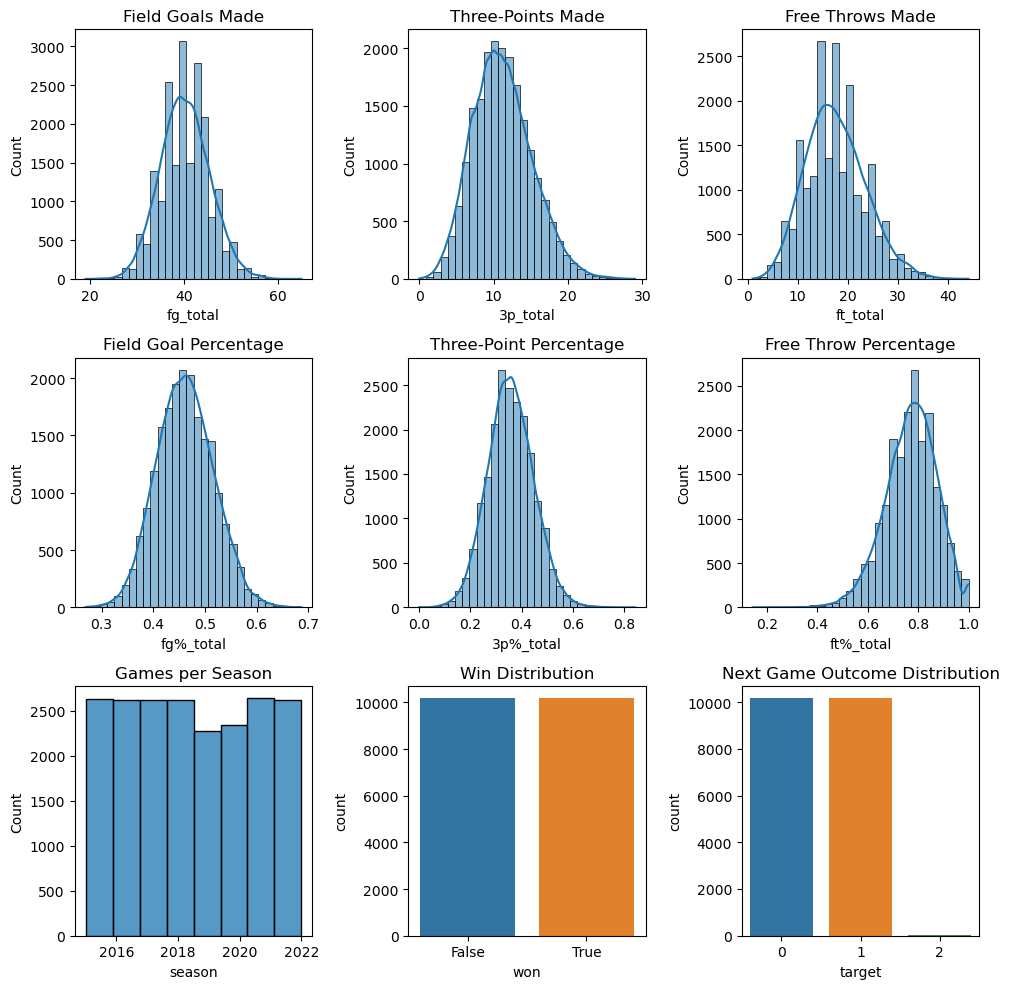

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# Plotting field goals, three-point shots, and free throws
sns.histplot(df['fg_total'], bins=30, kde=True, ax=axes[0, 0]).set_title('Field Goals Made')
sns.histplot(df['3p_total'], bins=30, kde=True, ax=axes[0, 1]).set_title('Three-Points Made')
sns.histplot(df['ft_total'], bins=30, kde=True, ax=axes[0, 2]).set_title('Free Throws Made')

# Plotting percentages for field goals, three-point shots, and free throws
sns.histplot(df['fg%_total'], bins=30, kde=True, ax=axes[1, 0]).set_title('Field Goal Percentage')
sns.histplot(df['3p%_total'], bins=30, kde=True, ax=axes[1, 1]).set_title('Three-Point Percentage')
sns.histplot(df['ft%_total'], bins=30, kde=True, ax=axes[1, 2]).set_title('Free Throw Percentage')

# Plotting games per season and distributions of win and next game outcomes
sns.histplot(df['season'], bins=len(df['season'].unique()), kde=False, ax=axes[2, 0]).set_title('Games per Season')
sns.countplot(x='won', data=df, ax=axes[2, 1]).set_title('Win Distribution')
sns.countplot(x='target', data=df, ax=axes[2, 2]).set_title('Next Game Outcome Distribution')

plt.tight_layout()
plt.show()


1. Field Goals Made and Three-Points Made distributions center around a common range, indicating a pattern in scoring strategies across games.
2. Percentage metrics for Field Goals, Three-Points, and Free Throws exhibit a normal distribution, reflecting a standard level of efficiency across matches.
3. The Games per Season distribution shows consistency in the number of games played, which supports analyses over multiple seasons.

In [14]:
def season_trend(column):
    # Check if the column data looks like percentages (values between 0 and 1)
    if df[column].max() <= 1:
        # If so, convert to percentage by multiplying by 100
        seasonal_averages = df.groupby('season')[column].mean() * 100
        ylabel = f'Average {column} (%)'
    else:
        # Otherwise, use the values as is
        seasonal_averages = df.groupby('season')[column].mean()
        ylabel = f'Average {column}'
    
    # Plotting the time series
    plt.figure(figsize=(14, 7))
    seasonal_averages.plot(kind='line', marker='o')
    plt.title(f'Average {column} by NBA Season')
    plt.xlabel('NBA Season')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.xticks(ticks=seasonal_averages.index, labels=seasonal_averages.index)
    plt.tight_layout()
    plt.show()

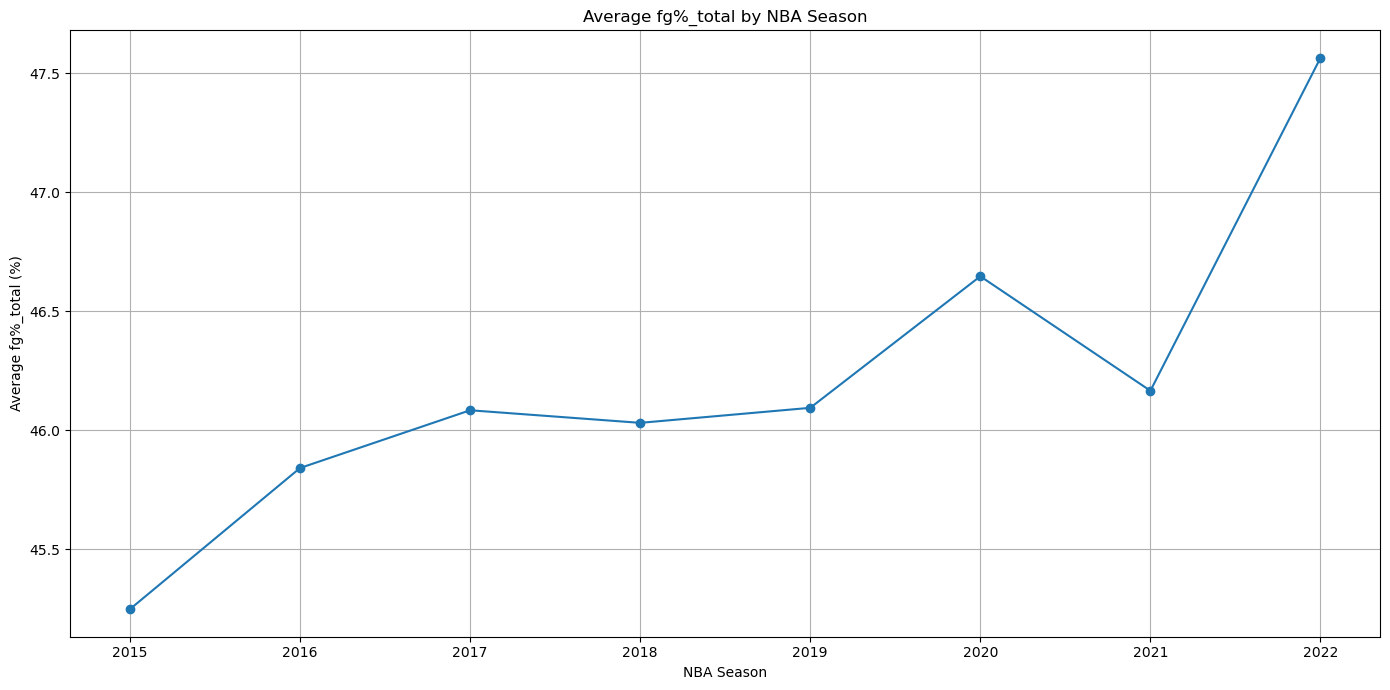

In [15]:
season_trend('fg%_total')

In [16]:

# # Define the number of teams per plot and the total number of teams
# teams_per_plot = 5
# total_teams = seasonal_team_averages.columns.size

# # Calculate the number of required plots (6 in this case for 30 teams)
# num_plots = total_teams // teams_per_plot

# # Create a figure with subplots
# fig, axs = plt.subplots(num_plots, 1, figsize=(15, 4 * num_plots), sharex=True)

# # Loop over the number of plots, plotting 5 teams at a time
# for i in range(num_plots):
#     # Get the subset of teams for the current plot
#     subset_of_teams = seasonal_team_averages.columns[i*teams_per_plot:(i+1)*teams_per_plot]
#     for team in subset_of_teams:
#         axs[i].plot(seasonal_team_averages.index, seasonal_team_averages[team], marker='o', label=team)
    
#     axs[i].set_title(f'Team Performance Comparison {i+1}')
#     axs[i].set_ylabel('Avg Field Goal %')
#     axs[i].grid(True)
#     axs[i].legend()

# # Set common X label
# plt.xlabel('NBA Season')
# plt.tight_layout()
# plt.show()


In [17]:
def plot_team_performance( metric):
    # Determine if the metric is a percentage (between 0 and 1)
    percentage_scale = df[metric].max() <= 1
    
    # Calculate the average metric for each team per season
    seasonal_team_averages = df.groupby(['season', 'team'])[metric].mean().unstack()

    # Scale up if the metric is a percentage
    if percentage_scale:
        seasonal_team_averages *= 100
        ylabel = f'Average {metric} (%)'
    else:
        ylabel = f'Average {metric}'

    # Identify the top and bottom 5 performing teams
    top_teams = seasonal_team_averages.mean(axis=0).sort_values(ascending=False).head(5).index
    bottom_teams = seasonal_team_averages.mean(axis=0).sort_values(ascending=True).head(5).index

    # Create subplots for the top and bottom performing teams
    fig, axs = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

    # Top 5 performing teams plot
    for team in top_teams:
        axs[0].plot(seasonal_team_averages.index, seasonal_team_averages.loc[:, team], marker='o', label=team)
    axs[0].set_title(f'Top 5 Performing Teams by {metric}')
    axs[0].set_ylabel(ylabel)
    axs[0].grid(True)
    axs[0].legend()

    # Bottom 5 performing teams plot
    for team in bottom_teams:
        axs[1].plot(seasonal_team_averages.index, seasonal_team_averages.loc[:, team], marker='o', label=team)
    axs[1].set_title(f'Bottom 5 Performing Teams by {metric}')
    axs[1].set_ylabel(ylabel)
    axs[1].grid(True)
    axs[1].legend()

    # Set common X label
    plt.xlabel('NBA Season')
    plt.tight_layout()
    plt.show()

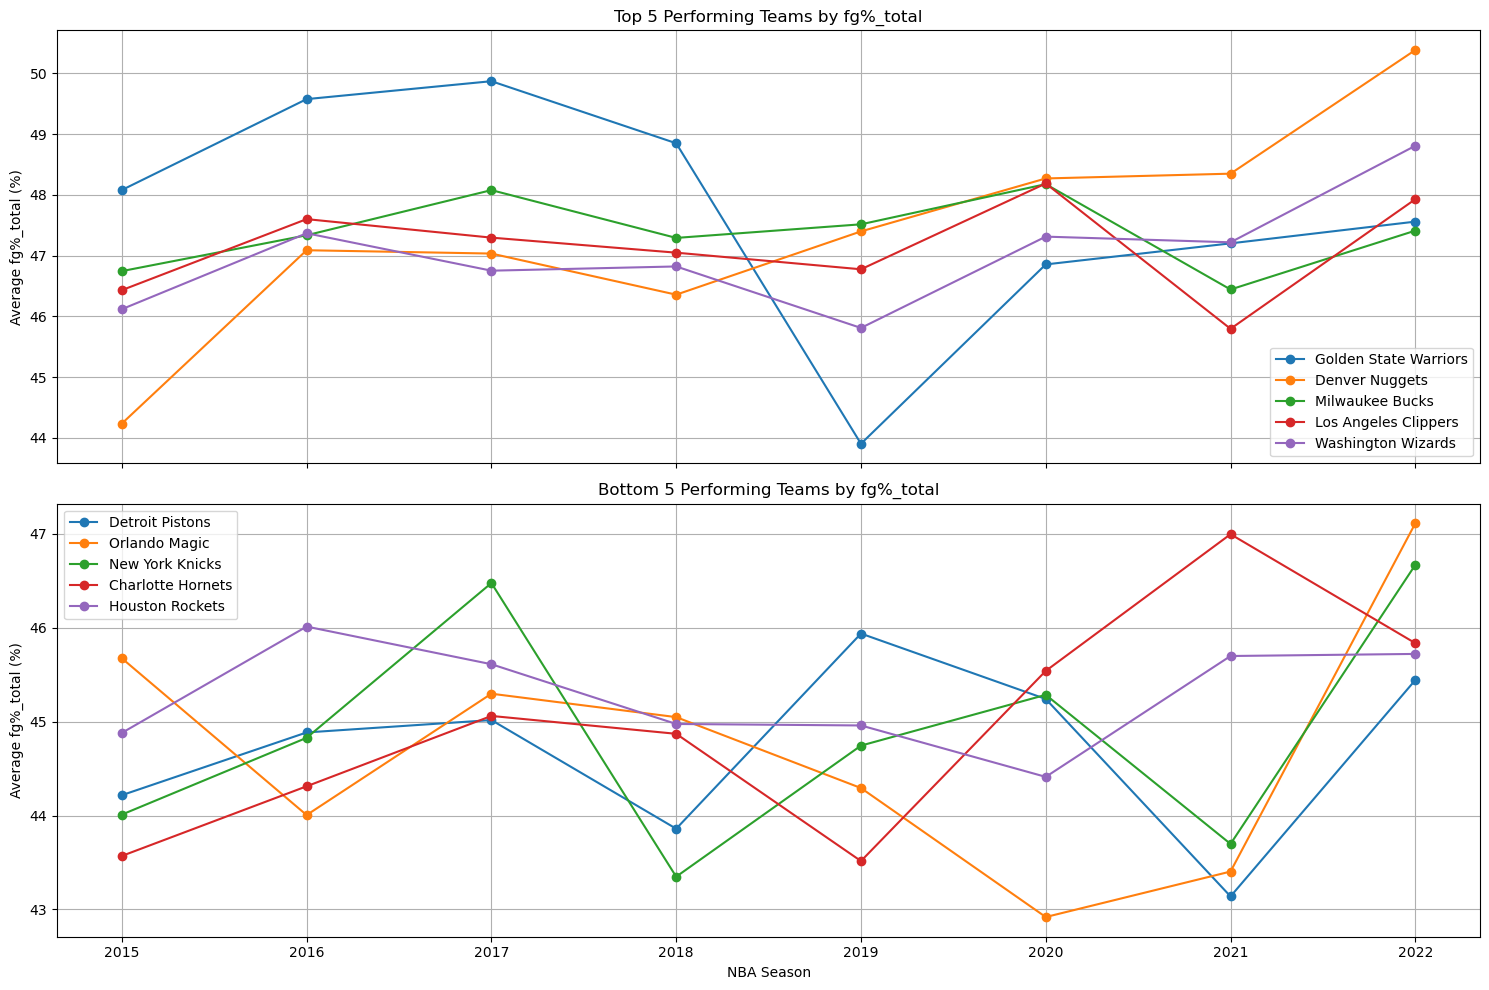

In [18]:
plot_team_performance('fg%_total') 

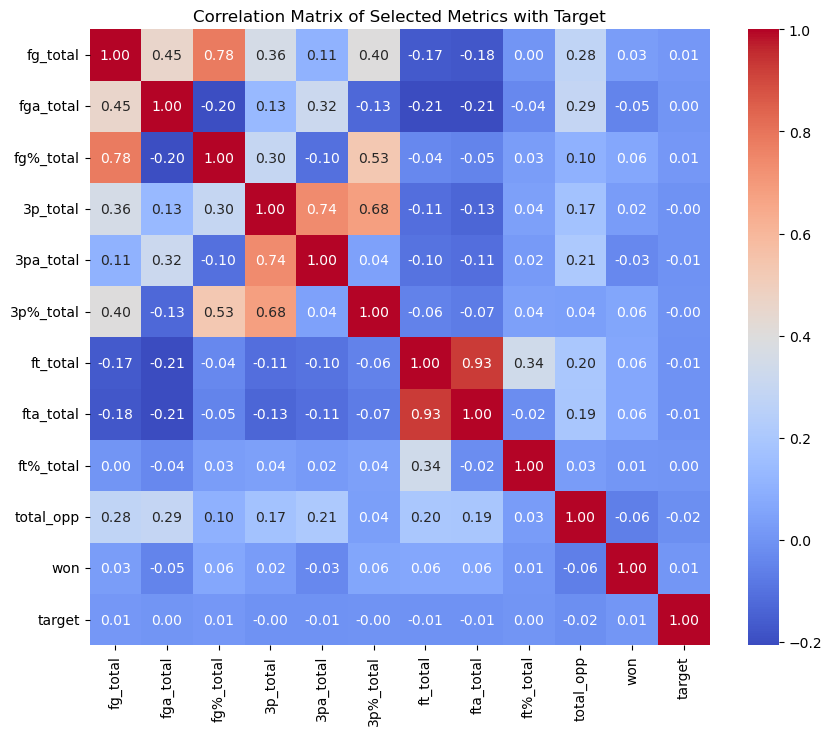

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[['fg_total', 'fga_total', 'fg%_total', '3p_total', '3pa_total', '3p%_total', 'ft_total', 'fta_total', 'ft%_total', 'total_opp', 'won', 'target']].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix of Selected Metrics with Target')
plt.show()

In [20]:
# Prepare the DataFrame specifically for classification
df_logisticRegression = df.drop(['won'], axis=1)  # Drop 'won' to avoid data leakage

# Selecting numerical features for the model (excluding categorical features and the target)
numerical_features = df_logisticRegression.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('target')  # Remove the target from the features list

# Define features X and target y
X = df_logisticRegression[numerical_features]
y = df_logisticRegression['target'].astype(int)

# Scaling features with MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(multi_class='ovr')  # 'ovr' indicates a one-vs-rest approach for multi-class

# Start timing
start_time = time.time()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Get probabilities for AUC calculation

# End timing
end_time = time.time()

# Time calculation
duration_seconds = end_time - start_time
duration_str = f"{int(duration_seconds // 3600)} hr {int((duration_seconds % 3600) // 60)} mins {int(duration_seconds % 60)} secs" if duration_seconds >= 3600 else f"{int(duration_seconds // 60)} mins {int(duration_seconds % 60)} secs"
print(f"Model training started at {time.ctime(start_time)} and ended at {time.ctime(end_time)}.")
print(f"Total time for model training: {duration_str}.")

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

# Calculate the AUC Score for multi-class classification
# Assuming a one-vs-rest method for multi-class AUC calculation
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"AUC Score: {auc_score:.2f}")

Model training started at Sun Apr 28 09:42:52 2024 and ended at Sun Apr 28 09:42:53 2024.
Total time for model training: 0 mins 1 secs.
Precision: 50.96%
Recall: 50.98%
F1-Score: 50.97%
AUC Score: 0.66


1. Moderate Classification Accuracy: The precision, recall, and F1-score values are around 51%, indicating a moderate level of accuracy and balance between the sensitivity and positive predictive value of the model.
2. Consistent Precision-Recall Balance: The close values of precision and recall suggest that the model is equally balanced in terms of avoiding false positives and false negatives, but improvements are necessary for both.
3. Average Discriminative Ability: An AUC score of 0.66 indicates that the model has average ability to discriminate between classes, which is acceptable but suggests there is significant room for improvement in model performance.